This cell imports all the necessary libraries such as Pandas for data manipulation, NumPy for numerical computations,
Matplotlib and Seaborn for visualizations.

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset chosen here is available on Kaggle and it contains synthesised information about the job market influenced by AI adoption and automation

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: suchithragandla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights


100%|██████████| 10.4k/10.4k [00:00<00:00, 13.4MB/s]

In [ ]:
df = pd.read_csv('/content/ai-powered-job-market-insights/ai_job_market_insights.csv')


In [ ]:
df.head(5)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


 df.info() displays basic information such as data types, column names. Here we have all columns expect one as numerical one i.e, Salary_USD.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [ ]:
df.shape

(500, 10)

Summary statistics of numeric columns i.e., which is only one column in this case 'Salary_USD'. This depicts the average salary for a job in AI domain is around 91300 USD per annum.

In [ ]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [ ]:
for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique Values: {df[column].nunique()}")
    print(f"Value Counts:\n{df[column].value_counts()}\n")


Column: Job_Title
Unique Values: 10
Value Counts:
Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

Column: Industry
Unique Values: 10
Value Counts:
Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

Column: Company_Size
Unique Values: 3
Value Counts:
Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

Column: Location
Unique Values: 10
Value Counts:
Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New Yo

Finding out if there are any null values within the dataset.

In [ ]:
df.isnull().sum()

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


Similarly verifying that no duplicates exists.

In [ ]:
df.duplicated().sum()

0

**Creating new column:**
Here, a new column 'AI_Impact_Score' is introduced which is a product of 'AI_Adoption_Level' and 'Automation_Risk' and range between 1-9.

In [ ]:
ai_impact = {'Low': 1, 'Medium': 2, 'High': 3}
df['AI_Impact_Score'] = df['AI_Adoption_Level'].map(ai_impact) * df['Automation_Risk'].map(ai_impact)


In [ ]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,AI_Impact_Score
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth,6
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline,6
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth,6
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth,3
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline,1


**Creating new column:** Another new column is created named as 'Continent'. This column maps various locations into continents giving us a broader geographic area to draw suggestions.

In [ ]:
df['Continent'] = df['Location'].map({
    'San Francisco': 'North America',
    'Singapore': 'Asia',
    'Sydney': 'Australia',
    'Dubai': 'Asia',
    'Tokyo': 'Asia',
    'New York': 'North America',
    'Berlin': 'Europe',
    'London': 'Europe',
    'Paris': 'Europe',
    'Toronto': 'North America'
})



In [ ]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,AI_Impact_Score,Continent
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth,6,Asia
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline,6,Asia
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth,6,Asia
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth,3,Europe
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline,1,Asia


Verifying if any entry in 'Salary_USD' is less than 0 i.e, -ve which leads to an invalid entry.

In [ ]:
df[df['Salary_USD'] < 0]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,AI_Impact_Score,Continent


The histogram below depicts the distribution of salaries in the dataset and it almost seems like a normal distribution.


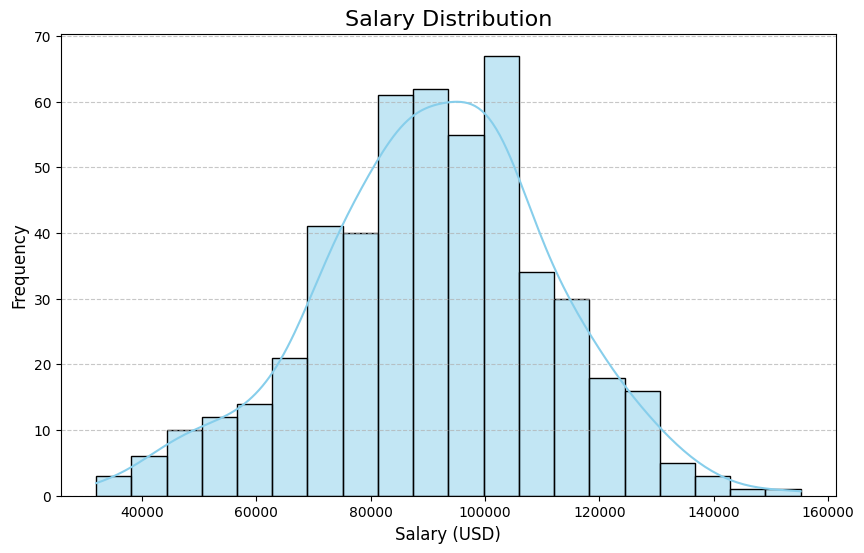

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_USD'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Salary Distribution', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Average salary by industry**
The below bar plot depicts, the average salary for unique industries in the dataset and the average for different industries range closely above 80k USD.

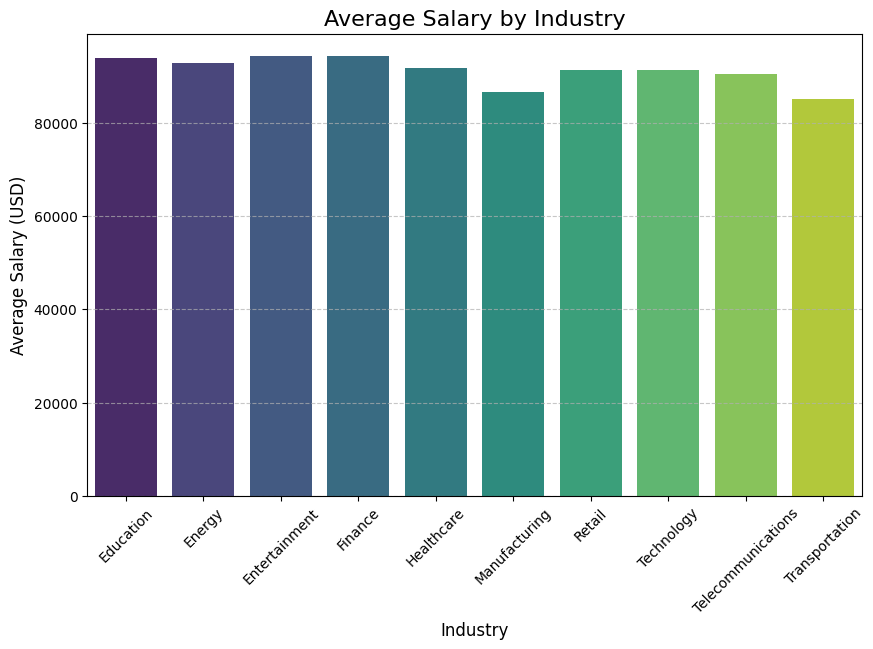

In [ ]:
avg_salary_by_industry = df.groupby('Industry')['Salary_USD'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_industry.index, y=avg_salary_by_industry.values, hue=avg_salary_by_industry.index, palette='viridis')
plt.title('Average Salary by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Proportion of jobs by industry**
The pie chart depicts the percentage of jobs in various industries, where technology, education and manufacturing being the top ones.

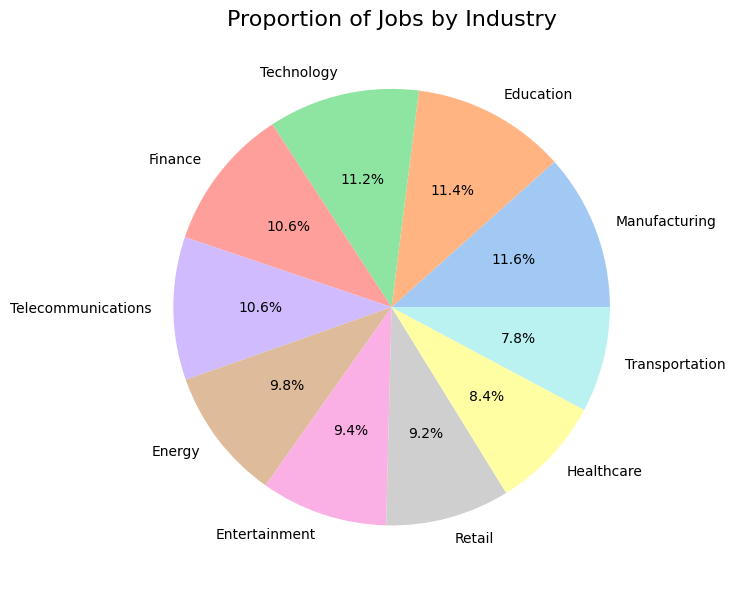

In [ ]:
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
industry_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
)

plt.title('Proportion of Jobs by Industry', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


**Salary distribution by continent**
The boxplot for the salary distribution by continent suggests that North America has the highest median salary and variability, while Australia has a lower spread. Whereas outliers reflect a few exceptionally high or low salaries.

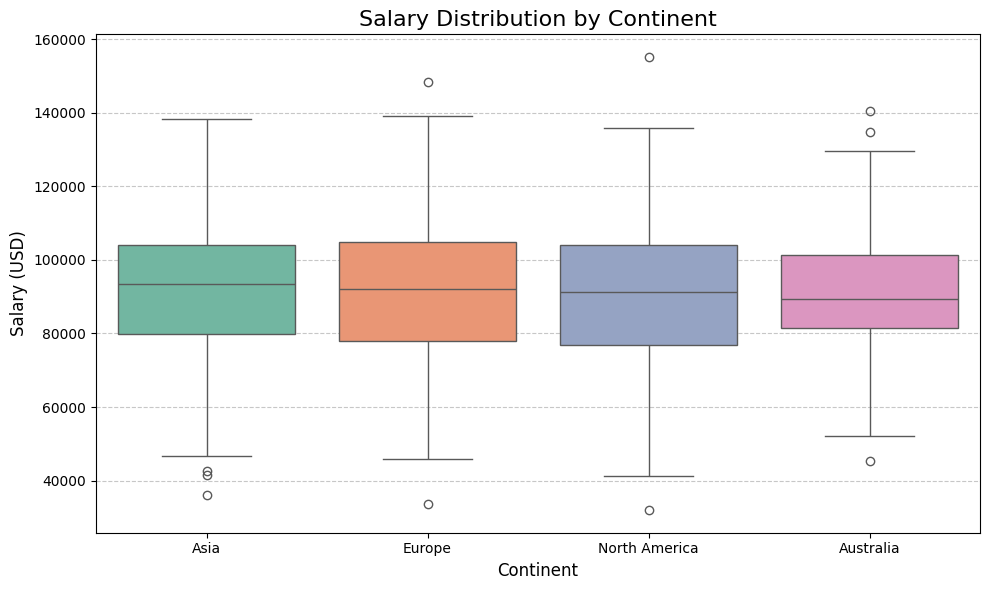

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Salary_USD', data=df, hue= 'Continent', palette='Set2')
plt.title('Salary Distribution by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Grouping 'Industry' and 'Job_Growth_Projection' columns to draw combined insights.

In [ ]:
growth_by_industry = df.groupby(['Industry', 'Job_Growth_Projection']).size().unstack(fill_value=0)

**Job growth projection by industry**
From Staked bar chart it can depicted that industries like Education and Finance show strong job growth, while sectors like manufacturing face notable job declines. Technology and Telecommunications maintain relative job stability, highlighting varying opportunities across industries.

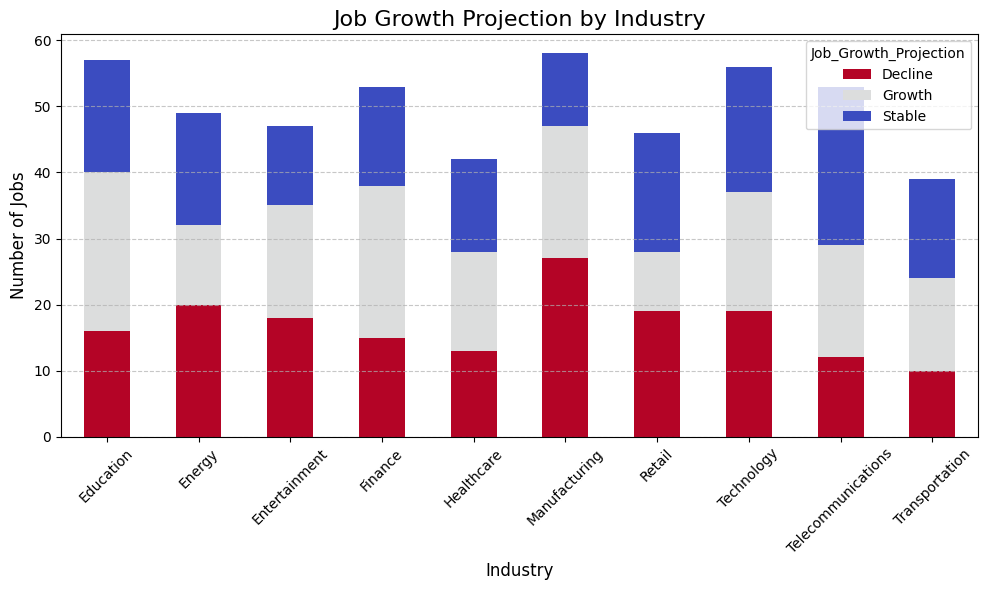

In [ ]:
growth_by_industry.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm_r')
plt.title('Job Growth Projection by Industry', fontsize=16)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xlabel('Industry', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Salary Distribution for Remote vs Non-Remote Jobs**
From the KDE plots it an depicted as remote-friendly jobs tend to offer higher salaries and a wider salary range, while non-remote jobs are more concentrated at lower salary levels. This shows a financial benefit to remote roles.

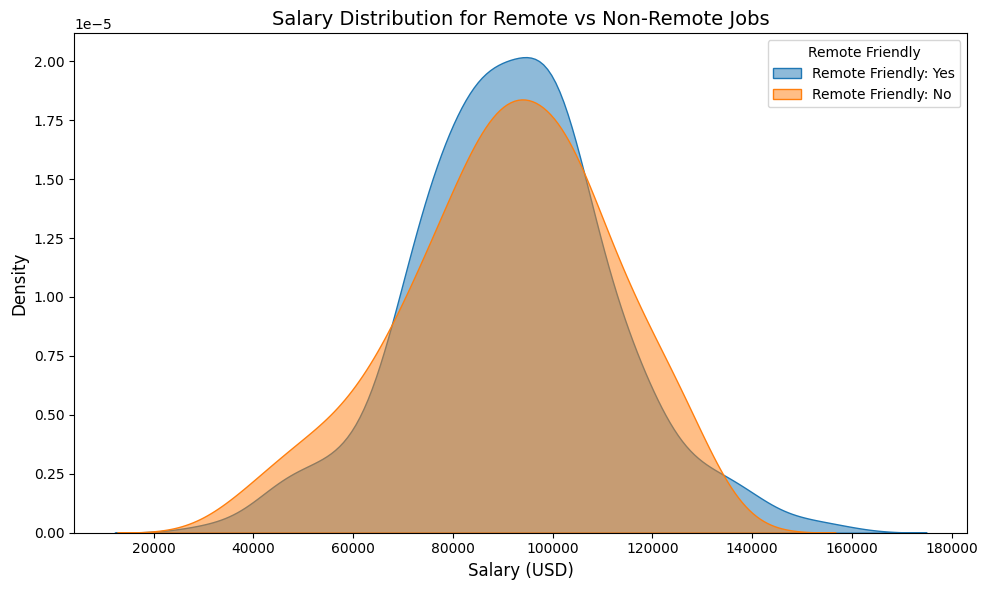

In [ ]:
plt.figure(figsize=(10, 6))

for remote_status in df['Remote_Friendly'].unique():
    subset = df[df['Remote_Friendly'] == remote_status]
    sns.kdeplot(
        subset['Salary_USD'],
        label=f'Remote Friendly: {remote_status}',
        fill=True,
        alpha=0.5
    )

plt.title('Salary Distribution for Remote vs Non-Remote Jobs', fontsize=14)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Remote Friendly')
plt.tight_layout()
plt.show()


**AI Impact Score by Industry and Company Size**
The heatmap for AI Impact Score based on Industry anf Company Size depicts that large companies lead AI adoption, especially in Healthcare, Transportation, and Technology industries. Notably, smaller companies in Manufacturing also show promising AI adoption. Overall, the heatmap reveals a disparity where larger firms invest more in AI technologies compared to smaller ones.

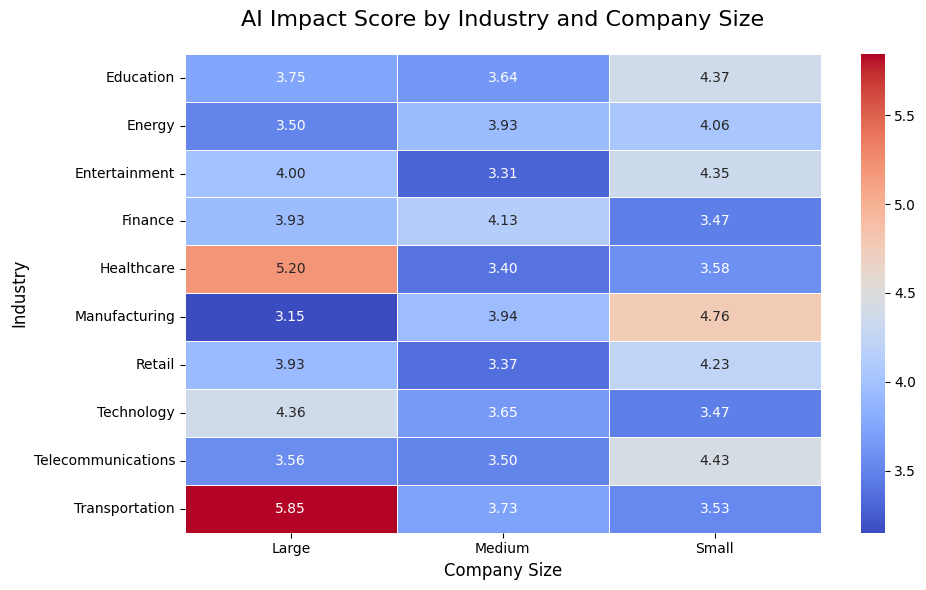

In [ ]:
heatmap_data = df.groupby(['Industry', 'Company_Size'])['AI_Impact_Score'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5,
)

plt.title('AI Impact Score by Industry and Company Size', fontsize=16, pad=20)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Industry', fontsize=12)

plt.tight_layout()
plt.show()


**Average Salary by Required Skill**
The horizontal bar chart gives an idea on average salary for each skill, where JavaScript, Python and Sales are marked as top 3 skills.

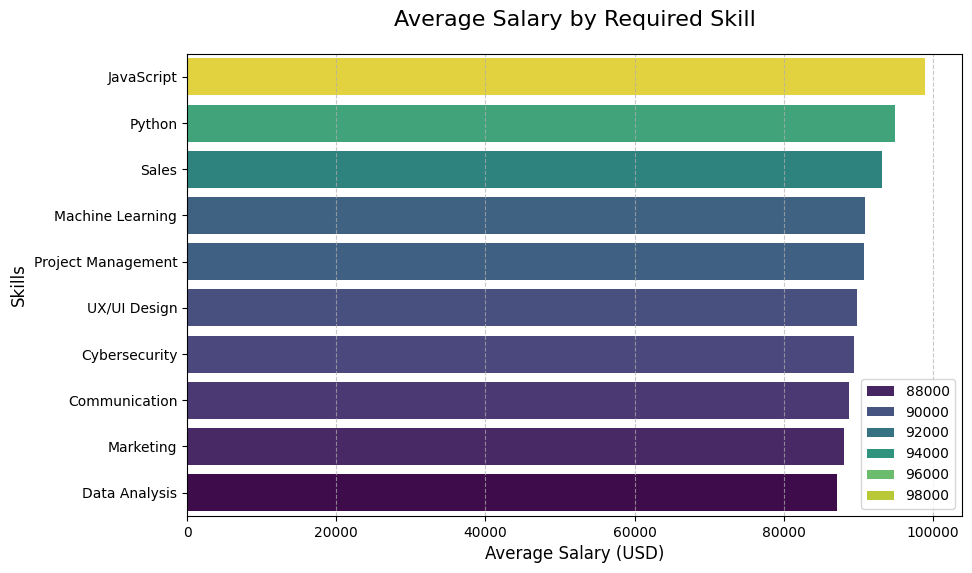

In [ ]:
avg_salary_by_skill = df.groupby('Required_Skills')['Salary_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_salary_by_skill.values,
    y=avg_salary_by_skill.index,
    palette='viridis',
    hue=avg_salary_by_skill.values
)


plt.title('Average Salary by Required Skill', fontsize=16, pad=20)
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Skills', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Average Automation Risk by Industry**
The bar chart depicts the automation risk in each industry and it can seen that in industries like Transportation and Manufacturing the greatest risk of automation exists.

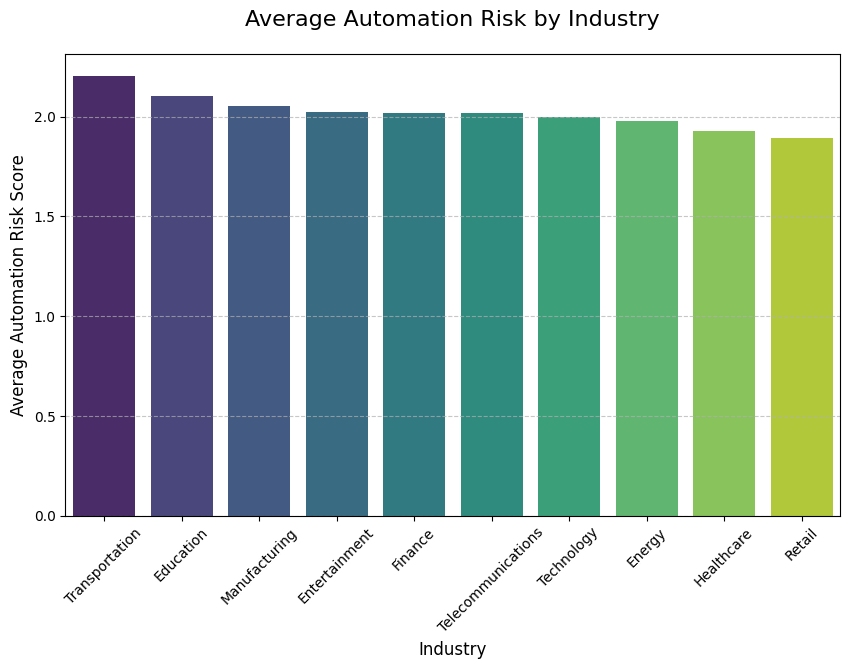

In [ ]:
risk_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Automation_Risk_Score'] = df['Automation_Risk'].map(risk_mapping)

avg_risk_by_industry = df.groupby('Industry')['Automation_Risk_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_risk_by_industry.index,
    y=avg_risk_by_industry.values,
    palette='viridis',
    hue=avg_risk_by_industry.index
)

plt.title('Average Automation Risk by Industry', fontsize=16, pad=20)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Automation Risk Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.show()

